#  VGGNET

## 0. 
  
VGGNET은 옥스포드 대학의 연구팀 VGG에 의해 개발된 모델로써, 2014년 이미지넷 이미지 인식 대회에서 준우승을 한 모델이다. 여기서 VGGNet은 16개 또는 19개 층으로 구성된 모델을 의미한다. 역사적으로 VGGNet부터 깊이가 확 깊어졌다. 이 이후로 GoogLeNet은 22층으로 깊어지고 152개의 층으로 구성된 ResNet 또한 제안되었다. 네트워크가 깊어질수록 성능이 좋아졌었다. 하지만 VGGNet은 사용하기 쉬운 구조와 좋은 성능 덕분에 GoogLeNet 보다 인기가 더 좋았다.  
  
## 1. VGGNET의 구조  
  
VGG연구팀은 깊이의 영향만을 최대한 확인하고자 컨볼루션 필터커널의 사이즈는 가장 작은 3x3으로 고정했다. 필터커널의 사이즈가 크면 그만큼 이미지의 사이즈가 금방 축소되기 때문에 네트워크의 깊이를 충분히 깊게 만드는게 불가능하다.  
VGG의 구조를 깊이 들여다보기전 3x3 필터로 두 차례 컨볼루션을 하는 것과 5x5 필터로 한 번 컨볼루션을 하는 것이 결과적으로 동일한 사이즈의 특성맵을 산출한다는 것이다.  
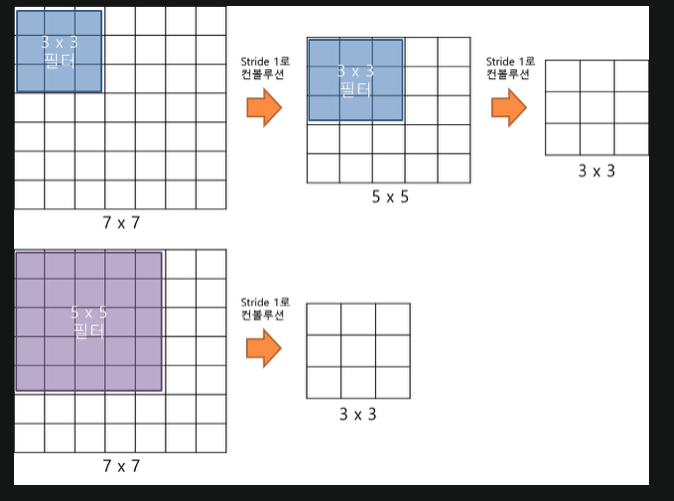  
이렇게 해서 나은 점 : 3x3 필터가 3개면 총 27개의 가중치를 갖는다. / 반면 5x5 필터는 25개의 가중치를 갖고 3x3 필터 한개가 추가되서 총 34개의 가중치를 갖는다. 가중치가 적을수록 훈련시켜야할 개수가 작아진다는 뜻으로 학습의 속도가 빨라진다. 동시에 층의 개수가 늘어나 특성에 비선형성을 증가시켜서 특성이 점점 더 유용해진다.  
   
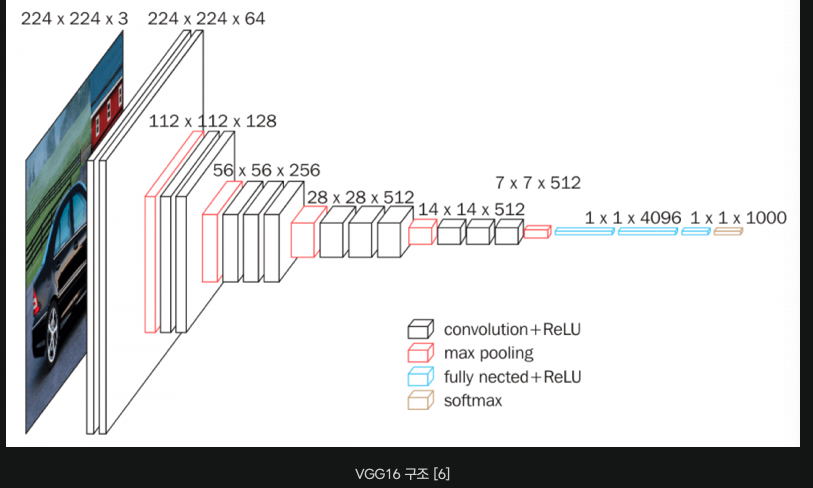  

0. input : 224x224x3 
1. 1층(conv1_1) : 64개의 3x3x3 필터커널로 입력이미지를 컨볼루션한다. zero padding은 1만큼 해줬고, stride=1로 설정한다. zero padding과 stride는 모든 컨볼루션층에서 동일하게 적용하겠다. -> 결과로 224x224x64 생성 / 활성화 시키기 위해 ReLU 함수 적용
2. 2층(conv1_2) : 2x2 로 최대풀링 해서 -> 112x112x64.
3. 3층(conv2_1) : 128개의 3x3x64 필터커널로 해준다. -> 112x112x128. 
4. 4층(conv2_2) : 맥스풀링 -> 56x56x128
5. 5층(conv3_1) : 56x56x256
6. conv3_2 : 56x56x256
7. conv3_3 : 28x28x256
8. conv4_1 : 28x28x512
9. conv4_2 : 28x28x512
10. conv4_3 : 14x14x512
11. conv5_1 : 14x14x512
12. conv5_2 : 14x14x512
13. conv5_3 : 7x7x512
14. fc1 : flatten 해준다. 결과적으로 7x7x512=25088개의 뉴런이 되고 fc1층의 4096개의 뉴런과 fully connected 된다. 훈련시 dropout이 적용된다.  
15. fc2 : 4096개의 뉴런과 fully connected된다. 훈련시 dropout이 적용
16. fc3 : 1000개의 뉴련으로 구성된다. fc2층의 4096개의 뉴런과 fully connected되고 출력값은 softmax함수로 활성화된다. 1000개의 뉴런으로 구성되었다는 것은 1000개의 클래스로 분류하는 목적으로 만들어진 네트워크이다.  